# Exploratory Notebook

In [118]:
import pandas as pd
import sqlite3
import zipfile
import os

In [119]:
imdb_filepath = "../data/im.db.zip"

In [120]:
extract_to_data = "../data/imdb"

In [121]:
# Open the zip file
with zipfile.ZipFile(imdb_filepath, 'r') as zip_ref:
    # Extract all the contents into the directory
    zip_ref.extractall(extract_to_data)

In [122]:
con = sqlite3.connect('../data/imdb/im.db')

In [123]:
imdb_schema = pd.read_sql("""

SELECT *
FROM sqlite_master

""", con)
imdb_schema

,type,name,tbl_name,rootpage,sql
0,table,movie_basics,movie_basics,2,"CREATE TABLE ""movie_basics"" (\n""movie_id"" TEXT..."
1,table,directors,directors,3,"CREATE TABLE ""directors"" (\n""movie_id"" TEXT,\n..."
2,table,known_for,known_for,4,"CREATE TABLE ""known_for"" (\n""person_id"" TEXT,\..."
3,table,movie_akas,movie_akas,5,"CREATE TABLE ""movie_akas"" (\n""movie_id"" TEXT,\..."
4,table,movie_ratings,movie_ratings,6,"CREATE TABLE ""movie_ratings"" (\n""movie_id"" TEX..."
5,table,persons,persons,7,"CREATE TABLE ""persons"" (\n""person_id"" TEXT,\n ..."
6,table,principals,principals,8,"CREATE TABLE ""principals"" (\n""movie_id"" TEXT,\..."
7,table,writers,writers,9,"CREATE TABLE ""writers"" (\n""movie_id"" TEXT,\n ..."


In [124]:
pd.read_sql("""

SELECT *
FROM movie_basics

""", con)

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"
...,...,...,...,...,...,...
146139,tt9916538,Kuambil Lagi Hatiku,Kuambil Lagi Hatiku,2019,123.0,Drama
146140,tt9916622,Rodolpho Teóphilo - O Legado de um Pioneiro,Rodolpho Teóphilo - O Legado de um Pioneiro,2015,NaN,Documentary
146141,tt9916706,Dankyavar Danka,Dankyavar Danka,2013,NaN,Comedy
146142,tt9916730,6 Gunn,6 Gunn,2017,116.0,None


In [125]:
pd.read_sql("""

SELECT *
FROM movie_ratings

""", con)

,movie_id,averagerating,numvotes
0,tt10356526,8.3,31
1,tt10384606,8.9,559
2,tt1042974,6.4,20
3,tt1043726,4.2,50352
4,tt1060240,6.5,21
...,...,...,...
73851,tt9805820,8.1,25
73852,tt9844256,7.5,24
73853,tt9851050,4.7,14
73854,tt9886934,7.0,5


In [126]:
rating_info_comb = pd.read_sql("""

SELECT *
FROM movie_basics AS b
    JOIN movie_ratings AS r
        ON b.movie_id = r.movie_id

""", con)
rating_info_comb

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres,movie_id,averagerating,numvotes
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",tt0063540,7.0,77
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama",tt0066787,7.2,43
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama,tt0069049,6.9,4517
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama",tt0069204,6.1,13
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy",tt0100275,6.5,119
...,...,...,...,...,...,...,...,...,...
73851,tt9913084,Diabolik sono io,Diabolik sono io,2019,75.0,Documentary,tt9913084,6.2,6
73852,tt9914286,Sokagin Çocuklari,Sokagin Çocuklari,2019,98.0,"Drama,Family",tt9914286,8.7,136
73853,tt9914642,Albatross,Albatross,2017,NaN,Documentary,tt9914642,8.5,8
73854,tt9914942,La vida sense la Sara Amat,La vida sense la Sara Amat,2019,NaN,None,tt9914942,6.6,5


In [127]:
top_movies_q = pd.read_sql("""

SELECT *
FROM movie_basics AS b
    JOIN movie_ratings AS r
        ON b.movie_id = r.movie_id
WHERE numvotes > 100000
ORDER BY averagerating DESC


""", con)
top_movies_q

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres,movie_id,averagerating,numvotes
0,tt5813916,The Mountain II,Dag II,2016,135.0,"Action,Drama,War",tt5813916,9.3,100568
1,tt4154796,Avengers: Endgame,Avengers: Endgame,2019,181.0,"Action,Adventure,Sci-Fi",tt4154796,8.8,441135
2,tt1375666,Inception,Inception,2010,148.0,"Action,Adventure,Sci-Fi",tt1375666,8.8,1841066
3,tt0816692,Interstellar,Interstellar,2014,169.0,"Adventure,Drama,Sci-Fi",tt0816692,8.6,1299334
4,tt1675434,The Intouchables,Intouchables,2011,112.0,"Biography,Comedy,Drama",tt1675434,8.5,677343
...,...,...,...,...,...,...,...,...,...
613,tt1815862,After Earth,After Earth,2013,100.0,"Action,Adventure,Drama",tt1815862,4.8,181687
614,tt1071875,Ghost Rider: Spirit of Vengeance,Ghost Rider: Spirit of Vengeance,2011,96.0,"Action,Fantasy,Thriller",tt1071875,4.3,103608
615,tt1502712,Fantastic Four,Fantastic Four,2015,100.0,"Action,Adventure,Drama",tt1502712,4.3,140148
616,tt2322441,Fifty Shades of Grey,Fifty Shades of Grey,2015,125.0,"Drama,Romance,Thriller",tt2322441,4.1,279126


In [128]:
import gzip
import shutil
with gzip.open('../Data/tmdb.movies.csv.gz', 'rb') as f_in:
    with open('../Data/tmdb.movies.csv', 'wb') as f_out:
        shutil.copyfileobj(f_in, f_out)

In [129]:
with gzip.open('../Data/bom.movie_gross.csv.gz', 'rb') as f_in:
    with open('../Data/bom.movie_gross.csv', 'wb') as f_out:
        shutil.copyfileobj(f_in, f_out)

In [130]:
with gzip.open('../Data/rt.movie_info.tsv.gz', 'rb') as f_in:
    with open('../Data/rt.movie_info.tsv', 'wb') as f_out:
        shutil.copyfileobj(f_in, f_out)

In [131]:
with gzip.open('../Data/rt.reviews.tsv.gz', 'rb') as f_in:
    with open('../Data/rt.reviews.tsv', 'wb') as f_out:
        shutil.copyfileobj(f_in, f_out)

In [132]:
with gzip.open('../Data/tn.movie_budgets.csv.gz', 'rb') as f_in:
    with open('../Data/tn.movie_budgets.csv', 'wb') as f_out:
        shutil.copyfileobj(f_in, f_out)

In [133]:
rt_movie_info_df = pd.read_csv("../Data/rt.movie_info.tsv", delimiter='\t')
rt_movie_info_df.head()

,id,synopsis,rating,genre,director,writer,theater_date,dvd_date,currency,box_office,runtime,studio
0,1,"This gritty, fast-paced, and innovative police...",R,Action and Adventure|Classics|Drama,William Friedkin,Ernest Tidyman,"Oct 9, 1971","Sep 25, 2001",NaN,NaN,104 minutes,NaN
1,3,"New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012","Jan 1, 2013",$,"600,000",108 minutes,Entertainment One
2,5,Illeana Douglas delivers a superb performance ...,R,Drama|Musical and Performing Arts,Allison Anders,Allison Anders,"Sep 13, 1996","Apr 18, 2000",NaN,NaN,116 minutes,NaN
3,6,Michael Douglas runs afoul of a treacherous su...,R,Drama|Mystery and Suspense,Barry Levinson,Paul Attanasio|Michael Crichton,"Dec 9, 1994","Aug 27, 1997",NaN,NaN,128 minutes,NaN
4,7,NaN,NR,Drama|Romance,Rodney Bennett,Giles Cooper,NaN,NaN,NaN,NaN,200 minutes,NaN


In [134]:
rt_movie_info_df.shape

(1560, 12)

In [135]:
rt_reviews_df = pd.read_csv("../Data/rt.reviews.tsv", delimiter='\t', encoding='windows-1252')
rt_reviews_df.tail()

,id,review,rating,fresh,critic,top_critic,publisher,date
54427,2000,The real charm of this trifle is the deadpan c...,NaN,fresh,Laura Sinagra,1,Village Voice,"September 24, 2002"
54428,2000,NaN,1/5,rotten,Michael Szymanski,0,Zap2it.com,"September 21, 2005"
54429,2000,NaN,2/5,rotten,Emanuel Levy,0,EmanuelLevy.Com,"July 17, 2005"
54430,2000,NaN,2.5/5,rotten,Christopher Null,0,Filmcritic.com,"September 7, 2003"
54431,2000,NaN,3/5,fresh,Nicolas Lacroix,0,Showbizz.net,"November 12, 2002"


In [136]:
tmbd_df = pd.read_csv("../Data/tmdb.movies.csv")
tmbd_df.head()

,Unnamed: 0,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
0,0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788
1,1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610
2,2,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368
3,3,"[16, 35, 10751]",862,en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174
4,4,"[28, 878, 12]",27205,en,Inception,27.920,2010-07-16,Inception,8.3,22186


In [137]:
tnbudget_df = pd.read_csv("../Data/tn.movie_budgets.csv")
tnbudget_df.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"


In [138]:
bom_df = pd.read_csv("../Data/bom.movie_gross.csv")
bom_df.head()

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010


In [139]:
tnbudget_df["production_budget"] = tnbudget_df["production_budget"].replace('[\$,]', '', regex=True).astype(int)

In [140]:
tnbudget_df["domestic_gross"] = tnbudget_df["domestic_gross"].replace('[\$,]', '', regex=True).astype(int)

In [141]:
tnbudget_df["worldwide_gross"] = tnbudget_df["worldwide_gross"].replace('[\$,]', '', regex=True).astype(int)

In [142]:
tnbudget_df["total_gross"] = tnbudget_df["domestic_gross"] + tnbudget_df["worldwide_gross"]

In [143]:
tnbudget_df["net_revenue"] = tnbudget_df["total_gross"] - tnbudget_df["production_budget"]

In [144]:
tnbudget_df.shape

(5782, 8)

In [145]:
tmbd_df.shape

(26517, 10)

In [146]:
tmbd_df.head()

,Unnamed: 0,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
0,0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788
1,1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610
2,2,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368
3,3,"[16, 35, 10751]",862,en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174
4,4,"[28, 878, 12]",27205,en,Inception,27.920,2010-07-16,Inception,8.3,22186


In [147]:
tmbd_df.drop(columns='original_title', inplace=True)

In [148]:
tmbd_df.rename(columns={'title':'movie'}, inplace=True)

In [149]:
tmbd_df.columns

Index(['Unnamed: 0', 'genre_ids', 'id', 'original_language', 'popularity',
       'release_date', 'movie', 'vote_average', 'vote_count'],
      dtype='object')

In [150]:
tmbd_df.head()

,Unnamed: 0,genre_ids,id,original_language,popularity,release_date,movie,vote_average,vote_count
0,0,"[12, 14, 10751]",12444,en,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788
1,1,"[14, 12, 16, 10751]",10191,en,28.734,2010-03-26,How to Train Your Dragon,7.7,7610
2,2,"[12, 28, 878]",10138,en,28.515,2010-05-07,Iron Man 2,6.8,12368
3,3,"[16, 35, 10751]",862,en,28.005,1995-11-22,Toy Story,7.9,10174
4,4,"[28, 878, 12]",27205,en,27.920,2010-07-16,Inception,8.3,22186


In [151]:
tnbudget_df.columns

Index(['id', 'release_date', 'movie', 'production_budget', 'domestic_gross',
       'worldwide_gross', 'total_gross', 'net_revenue'],
      dtype='object')

In [152]:
budget_review_df = pd.merge(tnbudget_df, tmbd_df, on='movie', how='inner')

In [156]:
budget_review_df.columns

Index(['id_x', 'release_date_x', 'movie', 'production_budget',
       'domestic_gross', 'worldwide_gross', 'total_gross', 'net_revenue',
       'Unnamed: 0', 'genre_ids', 'id_y', 'original_language', 'popularity',
       'release_date_y', 'vote_average', 'vote_count'],
      dtype='object')

In [158]:
budget_review_df.drop(columns=['release_date_x', 'Unnamed: 0', 'id_y'], inplace=True)

In [159]:
budget_review_df.head()

,id_x,movie,production_budget,domestic_gross,worldwide_gross,total_gross,net_revenue,genre_ids,original_language,popularity,release_date_y,vote_average,vote_count
0,1,Avatar,425000000,760507625,2776345279,3536852904,3111852904,"[28, 12, 14, 878]",en,26.526,2009-12-18,7.4,18676
1,2,Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875,1286727750,876127750,"[12, 28, 14]",en,30.579,2011-05-20,6.4,8571
2,4,Avengers: Age of Ultron,330600000,459005868,1403013963,1862019831,1531419831,"[28, 12, 878]",en,44.383,2015-05-01,7.3,13457
3,7,Avengers: Infinity War,300000000,678815482,2048134200,2726949682,2426949682,"[12, 28, 14]",en,80.773,2018-04-27,8.3,13948
4,9,Justice League,300000000,229024295,655945209,884969504,584969504,"[28, 12, 14, 878]",en,34.953,2017-11-17,6.2,7510


In [163]:
budget_review_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2385 entries, 0 to 2384
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id_x               2385 non-null   int64  
 1   movie              2385 non-null   object 
 2   production_budget  2385 non-null   int64  
 3   domestic_gross     2385 non-null   int64  
 4   worldwide_gross    2385 non-null   int64  
 5   total_gross        2385 non-null   int64  
 6   net_revenue        2385 non-null   int64  
 7   genre_ids          2385 non-null   object 
 8   original_language  2385 non-null   object 
 9   popularity         2385 non-null   float64
 10  release_date_y     2385 non-null   object 
 11  vote_average       2385 non-null   float64
 12  vote_count         2385 non-null   int64  
dtypes: float64(2), int64(7), object(4)
memory usage: 242.4+ KB


In [161]:
import matplotlib.pyplot as plt

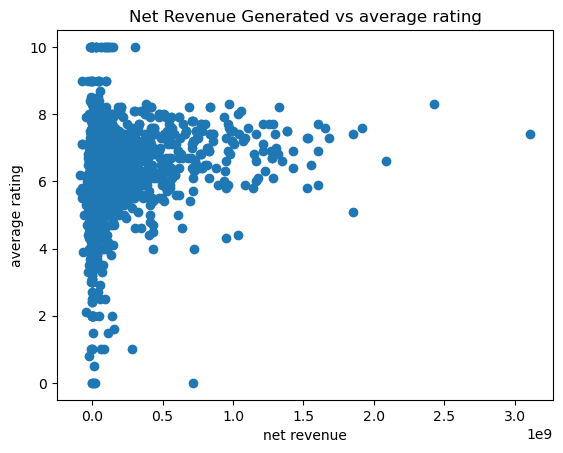

In [164]:
plt.scatter(budget_review_df['net_revenue'], budget_review_df['vote_average'])
plt.title('Net Revenue Generated vs average rating')
plt.xlabel('net revenue')
plt.ylabel('average rating')
plt.show()

In [165]:
budget_review_df['proportionate_net_revenue'] = budget_review_df['net_revenue'] / budget_review_df['vote_count']

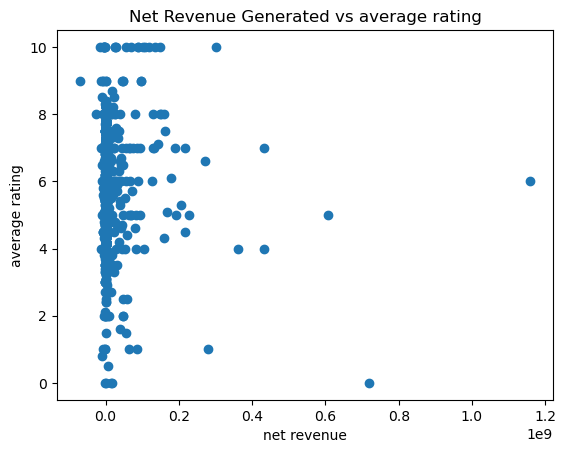

In [166]:
plt.scatter(budget_review_df['proportionate_net_revenue'], budget_review_df['vote_average'])
plt.title('Net Revenue Generated vs average rating')
plt.xlabel('net revenue')
plt.ylabel('average rating')
plt.show()

In [168]:
budget_review_df.drop(columns='proportionate_net_revenue', inplace=True)

In [169]:
budget_review_df.head()

,id_x,movie,production_budget,domestic_gross,worldwide_gross,total_gross,net_revenue,genre_ids,original_language,popularity,release_date_y,vote_average,vote_count
0,1,Avatar,425000000,760507625,2776345279,3536852904,3111852904,"[28, 12, 14, 878]",en,26.526,2009-12-18,7.4,18676
1,2,Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875,1286727750,876127750,"[12, 28, 14]",en,30.579,2011-05-20,6.4,8571
2,4,Avengers: Age of Ultron,330600000,459005868,1403013963,1862019831,1531419831,"[28, 12, 878]",en,44.383,2015-05-01,7.3,13457
3,7,Avengers: Infinity War,300000000,678815482,2048134200,2726949682,2426949682,"[12, 28, 14]",en,80.773,2018-04-27,8.3,13948
4,9,Justice League,300000000,229024295,655945209,884969504,584969504,"[28, 12, 14, 878]",en,34.953,2017-11-17,6.2,7510


In [170]:
budget_review_df.rename({'id_x':'id', 'release_date_y':'release_date'}, inplace=True)

In [171]:
file_path = '../Data/budget_review_df.csv'
budget_review_df.to_csv(file_path, index=False)